In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### read the raw data

In [2]:
data = pd.read_csv('definitions.csv')

# create a boolean indicator =True if the definition is of "machine learning"
data['ml'] = data['term'] == 'machine learning'

print(data.dtypes)
print(data.head(10))

term          object
definition    object
ml              bool
dtype: object
               term                                         definition    ml
0  machine learning  a process of automating algorithms, by which a...  True
1  machine learning  let the machine have freedom to make logical, ...  True
2  machine learning  using computational and algorithmic methods to...  True
3  machine learning  is a subfield of artificial intelligence in wh...  True
4  machine learning  a computational approach to understanding and ...  True
5  machine learning  a computerized process of trial and error wher...  True
6  machine learning  when a program recodes itself given new inform...  True
7  machine learning  program to machine learns by itself with previ...  True
8  machine learning  training computers to learn to do something ra...  True
9  machine learning  teaching machines, systems, and devices to thi...  True


### create feature set X (matrix) and vector of labels L

In [3]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
corpus = data['definition']
X = vectorizer.fit_transform(corpus)
L = data["ml"]

# print features names in X
vectorizer.get_feature_names()

['ability',
 'able',
 'about',
 'according',
 'achieve',
 'acquire',
 'act',
 'actions',
 'adjusts',
 'aid',
 'algorithmic',
 'algorithms',
 'all',
 'allow',
 'allowing',
 'always',
 'an',
 'analysis',
 'analyze',
 'and',
 'animal',
 'any',
 'applied',
 'applying',
 'approach',
 'are',
 'artificial',
 'as',
 'assess',
 'assist',
 'assuming',
 'at',
 'attempt',
 'automated',
 'automatically',
 'automating',
 'autonomous',
 'based',
 'behavior',
 'behaviors',
 'being',
 'better',
 'between',
 'biological',
 'bit',
 'bodies',
 'brain',
 'branches',
 'broad',
 'but',
 'by',
 'can',
 'cannot',
 'capable',
 'categorize',
 'class',
 'classification',
 'clustering',
 'cognition',
 'cognitive',
 'come',
 'comparable',
 'complete',
 'computational',
 'computationally',
 'computer',
 'computerized',
 'computers',
 'connected',
 'constituted',
 'constructed',
 'content',
 'correct',
 'could',
 'created',
 'creating',
 'data',
 'database',
 'databases',
 'decision',
 'decisions',
 'demonstrate',
 '

### fit new text to the feature extraction fit and evaluate its output

In [4]:
# test transform 
vectorizer.transform(['Something completely new.']).toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [5]:
for i in range(0, len(vectorizer.transform(['Something completely new.']).toarray()[0])):
    if vectorizer.transform(['Something completely new.']).toarray()[0][i] > 0:
        print(vectorizer.get_feature_names()[i])

new
something


### fit X, L to SVM using gradient descent

In [6]:
# fit SVM
from sklearn import linear_model
sgd = linear_model.SGDClassifier(n_iter=100000, alpha=0.1)
sgd.fit(X, L)

/Users/aaronhill/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


SGDClassifier(alpha=0.1, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=100000,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)

### assess performance

In [7]:
# look at performance measures
import my_measures

performance_measures = my_measures.BinaryClassificationPerformance(sgd.predict(X), L, 'sgd')
performance_measures.compute_measures()
print(performance_measures.performance_measures)

{'Pos': 21, 'Neg': 21, 'TP': 21, 'TN': 21, 'FP': 0, 'FN': 0, 'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0}


### test model on unseen definitions

In [8]:
# machine learning definitions
# Wikipedia, Expert System, Tech Emergence
ml_defs = ["Machine learning is a field of computer science that gives computers the ability to learn without being explicitly programmed.",
          "Machine learning is an application of artificial intelligence (AI) that provides systems the ability to automatically learn and improve from experience without being explicitly programmed. Machine learning focuses on the development of computer programs that can access data and use it learn for themselves.",
          "Machine Learning is the science of getting computers to learn and act like humans do, and improve their learning over time in autonomous fashion, by feeding them data and information in the form of observations and real-world interactions."]

for d in ml_defs:
    print(d)
    print("* * *")

Machine learning is a field of computer science that gives computers the ability to learn without being explicitly programmed.
* * *
Machine learning is an application of artificial intelligence (AI) that provides systems the ability to automatically learn and improve from experience without being explicitly programmed. Machine learning focuses on the development of computer programs that can access data and use it learn for themselves.
* * *
Machine Learning is the science of getting computers to learn and act like humans do, and improve their learning over time in autonomous fashion, by feeding them data and information in the form of observations and real-world interactions.
* * *


In [9]:
# AI definitions
# Wikipedia, Oxford dictionary
ai_defs = ["Artificial intelligence (AI, also machine intelligence, MI) is intelligence demonstrated by machines, in contrast to the natural intelligence (NI) displayed by humans and other animals.",
          "the theory and development of computer systems able to perform tasks that normally require human intelligence, such as visual perception, speech recognition, decision-making, and translation between languages"]

for d in ai_defs:
    print(d)
    print("* * *")

Artificial intelligence (AI, also machine intelligence, MI) is intelligence demonstrated by machines, in contrast to the natural intelligence (NI) displayed by humans and other animals.
* * *
the theory and development of computer systems able to perform tasks that normally require human intelligence, such as visual perception, speech recognition, decision-making, and translation between languages
* * *


In [10]:
# Definitions of unrelated things: kitten, piano, widget
other_defs = ["A kitten, also known as a kitty or kitty cat, is a juvenile cat.",
             "The piano is an acoustic, stringed musical instrument invented in Italy by Bartolomeo Cristofori around the year 1700 in which the strings are struck by hammers.",
             "a small gadget or mechanical device, especially one whose name is unknown or unspecified",
             "data data data data data data data data data data data data"]

for d in other_defs:
    print(d)
    print("* * *")

A kitten, also known as a kitty or kitty cat, is a juvenile cat.
* * *
The piano is an acoustic, stringed musical instrument invented in Italy by Bartolomeo Cristofori around the year 1700 in which the strings are struck by hammers.
* * *
a small gadget or mechanical device, especially one whose name is unknown or unspecified
* * *
data data data data data data data data data data data data
* * *


### function to transform new definitions to a X vector

In [11]:
def get_prediction(definition):
    text_x = vectorizer.transform([definition]).toarray()
    return(sgd.predict(text_x))

In [12]:
sgd = linear_model.SGDClassifier(n_iter=100000, alpha=0.0001)
sgd.fit(X, L)

/Users/aaronhill/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=100000,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)

### view predicted classifications of new definitions

In [13]:
print("Model predictions for 'machine learning' definitions:")
for mld in ml_defs:
    print(get_prediction(mld))
    
print("* * *")
print("Model predictions for 'AI' definitions:")
for aid in ai_defs:
    print(get_prediction(aid))

print("* * *")
print("Model predictions for other definitions (kitten, piano, widget):")
for otherd in other_defs:
    print(get_prediction(otherd))

Model predictions for 'machine learning' definitions:
[ True]
[ True]
[ True]
* * *
Model predictions for 'AI' definitions:
[False]
[False]
* * *
Model predictions for other definitions (kitten, piano, widget):
[False]
[False]
[False]
[ True]


### ROC plot to compare performance of various models and fits

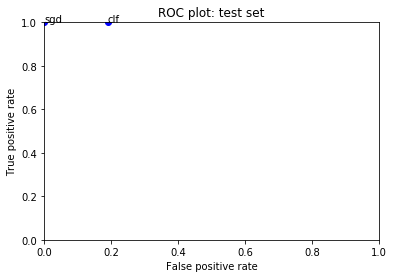

In [14]:
# fit SVM
#from sklearn import linear_model
#sgd = linear_model.SGDClassifier()
#sgd.fit(X, L)

# fit SVM
from sklearn.svm import SVC
clf = SVC()
clf.fit(X, L)

import my_measures
sgd_measures = my_measures.BinaryClassificationPerformance(sgd.predict(X), L, 'sgd')
sgd_measures.compute_measures()

clf_measures = my_measures.BinaryClassificationPerformance(clf.predict(X), L, 'clf')
clf_measures.compute_measures()

fits = [sgd_measures, clf_measures]

for fit in fits:
    plt.plot(fit.performance_measures['FP'] / fit.performance_measures['Neg'], 
             fit.performance_measures['TP'] / fit.performance_measures['Pos'], 'bo')
    plt.text(fit.performance_measures['FP'] / fit.performance_measures['Neg'], 
             fit.performance_measures['TP'] / fit.performance_measures['Pos'], fit.desc)
plt.axis([0, 1, 0, 1])
plt.title('ROC plot: test set')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()